# Introdução
O objetivo principal desse projeto é de treinar um modelo para que ele seja capaz de prever o diagnóstico de diabetes tipo 2 em mulheres com base em 8 variáveis diagnósticas, como nível de glicose, IMC, idade e pressão arterial.

Foram realizadas as etapas de exploração e pré-processamento dos dados para o treinamento e validação dos modelos supervisionados e não supervisionado. Para o modelo supervisionado foi feita uma validação cruzada utilizando o LogisticRegression e RandomForest afim de evitar overfitting, foram utilizados esses modelos por que são os mais recomendados, no caso do LogistcRegression ele foi usado como ponto de partida, por ser considerado ótimo para usar como modelo base por ser simples, rápido e de fácil interpretação, enquanto que o RandomForest por ser considerado como um modelo de alta perfomance ele ajudou a obter uma melhor acurácia. Para o modelo não supervisionado foi utilizado o K-means, onde os dados foram segmentados e agrupados como clusters (grupos), onde cada dado foi analizado por suas semelhanças e diferênças de acordo com a média (centroides) e em seguida recalculados para encontrar perfis de risco entre as pacientes. Para aplicação final foi feito o deploy no Streamlit pertindo uma maior interação com os modelos.

## Link do repositório do Github:

https://github.com/Rayralima/Classificador-de-diabetes-tipo-2

## Fonte de Dados:

Link: https://www.kaggle.com/datasets/uciml/pima-indians-diabetes-database

In [2]:
import kagglehub

# Baixando versão mais recente do dataset
path = kagglehub.dataset_download("uciml/pima-indians-diabetes-database")

print("Path to dataset files:", path)

Path to dataset files: C:\Users\rayra\.cache\kagglehub\datasets\uciml\pima-indians-diabetes-database\versions\1


## Importação de Bibliotecas

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv("diabetes.csv")

## Análise Exploratória
Através da análise exploratória foi possível observar que as features como Glucose, BMI e Age possuem a correlação mais forte com o Outcome (diagnóstio) comparados as outras. Foram identificados valores 0 em colunas como Glucose, BMI e Insulin, ou seja, dados ausentes ou nulos. Para corrigir os dados nulos foi utilizado a estratégia de imputação dos dados, substituindo os valores 0 pela mediana dessas colunas. Por fim os dados então foram padronizados com StandarScaler para garantir que as diferentes escalas das features não distorcessem a perfomance dos modelos. 

In [4]:
print(df.head())

   Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6      148             72             35        0  33.6   
1            1       85             66             29        0  26.6   
2            8      183             64              0        0  23.3   
3            1       89             66             23       94  28.1   
4            0      137             40             35      168  43.1   

   DiabetesPedigreeFunction  Age  Outcome  
0                     0.627   50        1  
1                     0.351   31        0  
2                     0.672   32        1  
3                     0.167   21        0  
4                     2.288   33        1  


In [5]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [6]:
print(df.describe())

       Pregnancies     Glucose  BloodPressure  SkinThickness     Insulin  \
count   768.000000  768.000000     768.000000     768.000000  768.000000   
mean      3.845052  120.894531      69.105469      20.536458   79.799479   
std       3.369578   31.972618      19.355807      15.952218  115.244002   
min       0.000000    0.000000       0.000000       0.000000    0.000000   
25%       1.000000   99.000000      62.000000       0.000000    0.000000   
50%       3.000000  117.000000      72.000000      23.000000   30.500000   
75%       6.000000  140.250000      80.000000      32.000000  127.250000   
max      17.000000  199.000000     122.000000      99.000000  846.000000   

              BMI  DiabetesPedigreeFunction         Age     Outcome  
count  768.000000                768.000000  768.000000  768.000000  
mean    31.992578                  0.471876   33.240885    0.348958  
std      7.884160                  0.331329   11.760232    0.476951  
min      0.000000                  

# Distribuição das classes

No gráfico pode-se observar que há um maior números de pessoas que não são diabéticas, o que pode influenciar no modelo, tornando-o capaz de detectar facilmente um paciente que não tenha diabetes e detectar razoavelmente um paciente que tenha diabetes. Ele ajuda a visualizar de forma clara e precisa no formato dos dados, como estão distrídos e principalmente na detecção de anomalias.

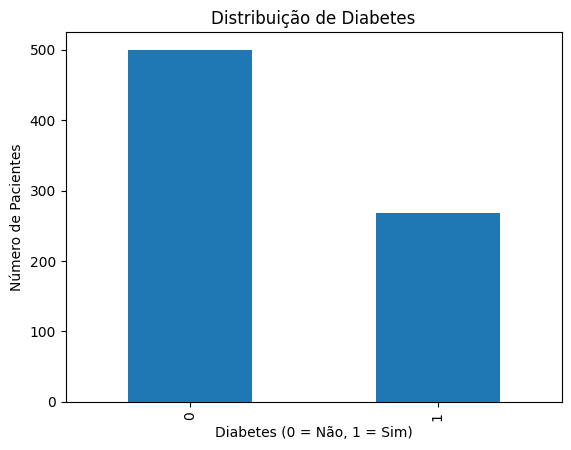

In [7]:
df['Outcome'].value_counts().plot(kind='bar', title='Distribuição de Diabetes')
plt.xlabel('Diabetes (0 = Não, 1 = Sim)')
plt.ylabel('Número de Pacientes')
plt.show()

# Correlação entre variáveis
Este mapa de calor (heatmap) mostra a correlação de Pearson (uma medida de -1 a 1) entre todas as variáveis. Ele nos diz quais variáveis se movem juntas. Focando na relação prinpal Outocome (Diagnóstico) pode-se observar que há uma correlação forte com Glucose (0.47), moderada em BMI (0.29), muito fraca com BloodPressure (0.07) e muito fraca também com SkinThickness (0.08). No geral não há nenhuma correlação extremamente alta entre as features, há mais presença de correlações moderadas, o que é ótimo para o modelo. Sendo assim os melhores candidatos para o treinamento do modelo são: Glucose, BMI e Age por possuírem as melhores e mais equilibradas correlações. 

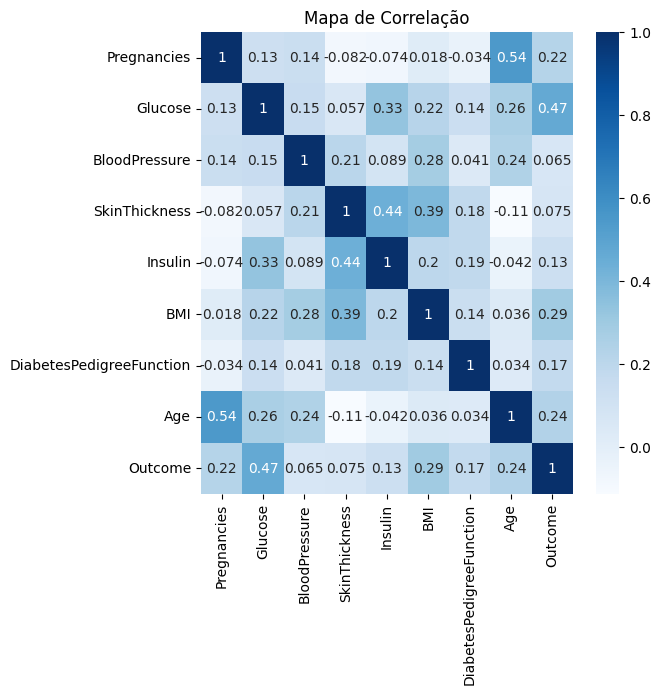

In [8]:
plt.figure(figsize=(6, 6))
sns.heatmap(df.corr(), annot=True, cmap="Blues")
plt.title("Mapa de Correlação")
plt.show()

## Pré-processamento:
Nessa etapa foi feita a imputação dos dados nulos e substituídos pela mediana das respectivas colunas. Depois foi utilizada o StandardScaler para padronizar os dados afim de não haver distorção dos mesmos.

In [9]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Verificar valores 0 onde não deveriam existir
cols = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols:
    df[col] = df[col].replace(0, df[col].median())

X = df.drop("Outcome", axis=1)
y = df["Outcome"]

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Para o aprendizado supervisionado:

## Treinamento dos modelos e avaliação:

Nessa etapa foi inicialmente escolhido o modelo LogisticRegression para ser usado como base. Posteriormente foi utilizado o RandomForest como modelo definitivo para trazer uma melhor acurácia por ser um modelo mais robusto e sua alta capacidade dede lidar com com relações não lineares e de já ter uma relativa robustez contra overfiting. O modelo RandomForest conseguiu atingir uma acurácia de 74%, acertando 78 casos em que os pacientes eram saudáveis. Porém um ponto de atenção é que ele obteve 21 falsos positivos e deixou de diagnosticar 19 pacientes que eram diabédicos o que do ponto de vista médico é extremamente crítico. No geral o modelo é razoável em identificar pacientes Diabéticas (Recall de 65%). Isso significa que, de cada 100 pacientes que realmente têm diabetes, o modelo consegue identificar corretamente 65 delas (as outras 35 são "falsos negativos)

In [11]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Modelos
log_model = LogisticRegression()
rf_model = RandomForestClassifier()

log_model.fit(X_train, y_train)
rf_model.fit(X_train, y_train)

# Avaliação
pred_log = log_model.predict(X_test)
pred_rf = rf_model.predict(X_test)

acc_log = accuracy_score(y_test, pred_log)
acc_rf = accuracy_score(y_test, pred_rf)

print("Logistic Regression Acurácia:", round(acc_log, 2))
print("Random Forest Acurácia:", round(acc_rf, 2))
print(classification_report(y_test, pred_log))
print(classification_report(y_test, pred_rf))
print(confusion_matrix(y_test, pred_rf))

Logistic Regression Acurácia: 0.77
Random Forest Acurácia: 0.76
              precision    recall  f1-score   support

           0       0.81      0.83      0.82        99
           1       0.68      0.65      0.67        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.77       154

              precision    recall  f1-score   support

           0       0.81      0.82      0.81        99
           1       0.67      0.65      0.66        55

    accuracy                           0.76       154
   macro avg       0.74      0.74      0.74       154
weighted avg       0.76      0.76      0.76       154

[[81 18]
 [19 36]]


## Avaliação com 30 execuções (validação cruzada)
A validação cruzada foi crucial para o modelo pois ela testa o modelo 30 vezes, usando diferentes partes dos dados, para garantir que os dados estejam estáveis. O resultado foi uma média de acurácia de 77%, o que torna o nosos modelo bastante confiável.

In [12]:
from sklearn.model_selection import StratifiedKFold
import numpy as np

skf = StratifiedKFold(n_splits=30, shuffle=True, random_state=42)

log_accs = []
rf_accs = []

for train_index, test_index in skf.split(X_scaled, y):
    X_train, X_test = X_scaled[train_index], X_scaled[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Logistic Regression
    log_model = LogisticRegression()
    log_model.fit(X_train, y_train)
    log_accs.append(accuracy_score(y_test, log_model.predict(X_test)))

    # Random Forest
    rf_model = RandomForestClassifier()
    rf_model.fit(X_train, y_train)
    rf_accs.append(accuracy_score(y_test, rf_model.predict(X_test)))

print(f"Logistic Regression - Média: {np.mean(log_accs):.2f}, Desvio Padrão: {np.std(log_accs):.2f}")
print(f"Random Forest - Média: {np.mean(rf_accs):.2f}, Desvio Padrão: {np.std(rf_accs):.2f}")

Logistic Regression - Média: 0.77, Desvio Padrão: 0.07
Random Forest - Média: 0.76, Desvio Padrão: 0.09


## Salvar o melhor modelo com pickle
O Pickle vai treinar com todos os dados e depois salva-lo como arquivo pkl, tornando-o mais robusto para o Streamlit.

In [13]:
import pickle

# Treine com todo o conjunto agora
final_model = RandomForestClassifier()
final_model.fit(X_scaled, y)

# Salve o modelo e o scaler
with open("modelo_diabetes.pkl", "wb") as f:
    pickle.dump(final_model, f)

with open("scaler.pkl", "wb") as f:
    pickle.dump(scaler, f)

# Para o aprendizado não supervisionado:
Através do algorítimo K-means foi possível segmentar os pacientes em clusters(grupos), onde foram separados por características semelhantes, sem usar a variável Outcome(diagnóstico) afim de descobrir perfis de risco naturais dos dados. Para validação foi utilizado o método Elbow para identificar o número ideial de clusters, o que foi possivel mostrar que a inércia (WCSS) diminui drasticamente até o k=3, depois a redução se torna menos acentuada. Com isso foi decidido que o número ideal de clusters para ser utilizado seria k=3.

## Instalando bibliotecas

In [14]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import os

## Pré-Processamento

In [15]:
df = pd.read_csv('diabetes.csv')
df_processado = df.copy()
cols_with_zeros = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']
for col in cols_with_zeros:
    median_val = df_processado[df_processado[col] != 0][col].median()
    df_processado[col] = df_processado[col].replace(0, median_val)

X = df_processado.drop("Outcome", axis=1)
y = df_processado["Outcome"]

# Carregamento do Scaller salvo
scaler_path = "scaler.pkl"
with open(scaler_path, "rb") as f:
    scaler = pickle.load(f)

# Aplicando o scaler
X_scaled = scaler.transform(X)


## Validando modelo com Elbow Method

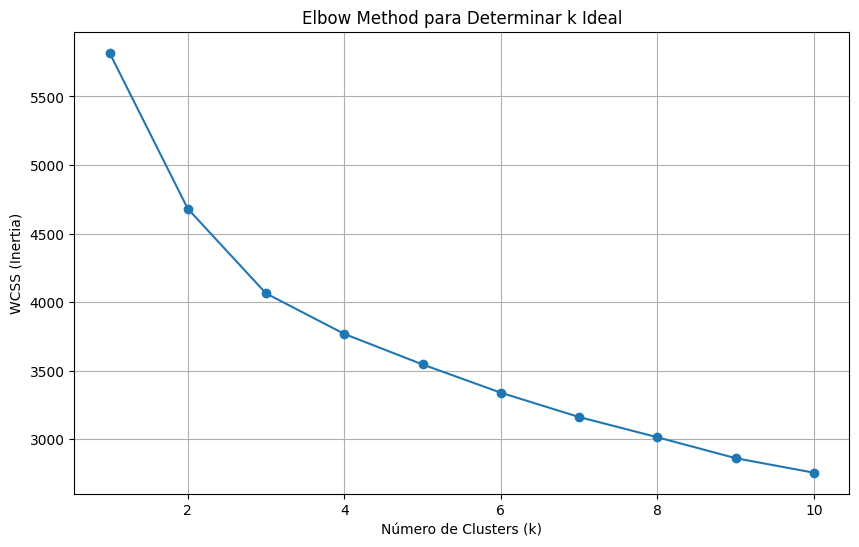

In [16]:
# Aplicando o Elbow Method para encontrar o número ideal de clusters
wcss = []
k_range = range(1, 11)
for k in k_range:
    kmeans_elbow = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
    kmeans_elbow.fit(X_scaled)
    wcss.append(kmeans_elbow.inertia_)
    
# Visualizando o Elbow Method
plt.figure(figsize=(10, 6))
plt.plot(k_range, wcss, marker='o')
plt.xlabel('Número de Clusters (k)')
plt.ylabel('WCSS (Inertia)')
plt.title('Elbow Method para Determinar k Ideal')
plt.grid(True)
plt.savefig('elbow_method.png')
plt.show()

## Treinamento do modelo com k-Means

In [17]:
k = 3
print(f"Treinando k-Means com k={k}")
kmeans = KMeans(n_clusters=k, init='k-means++', n_init=10, random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Salvando modelo k-Means
with open("kmeans_model.pkl", "wb") as f:
    pickle.dump(kmeans, f)

Treinando k-Means com k=3


## Interpretanto os Clusters
* Cluster 1: "Perfil de Baixo Risco" (335 pacientes)
Este é o maior grupo e o mais saudável. Possui a menor proporção de diabetes (apenas 13%).
São as pacientes mais jovens (média de 26 anos), com o menor IMC (28.5) e menor Glicose (106).
* Cluster 0: "Perfil de Risco por Idade/Gestações" (248 pacientes)
Este grupo tem uma alta proporção de diabetes (52%).
O risco aqui é fortemente associado à idade (média de 46 anos) e ao número de gestações (média de 7.4), que são os mais altos de todos os grupos.

* Cluster 2: "Perfil de Risco Metabólico" (185 pacientes)
Este grupo também tem alta proporção de diabetes (52%), mas por motivos diferentes do Cluster 0.
Embora sejam jovens (média de 29 anos), elas possuem os piores indicadores metabólicos: a Glicose mais alta (137), o IMC mais alto (39) e a Insulina mais alta (191).

In [18]:
df_analise = X.copy()
df_analise['Cluster'] = clusters
df_analise['Outcome'] = df_processado['Outcome']

# Cálculo da média, tamanho e proporção de cada cluster
cluster_analise_mean = df_analise.groupby('Cluster').mean().round(2)
cluster_analise_size = df_analise['Cluster'].value_counts().to_frame('Tamanho').sort_index()
cluster_analise_outcome = df_analise.groupby('Cluster')['Outcome'].mean().to_frame('Proporcao_Diabetes').round(2)

cluster_summary = pd.concat([cluster_analise_size, cluster_analise_outcome, cluster_analise_mean], axis=1)
cluster_summary = cluster_summary.drop(columns=['Outcome'])

# Organizado Clusters para melhor interpretação
cols_order = ['Size', 'Proporcao_Diabetes', 'Glucose', 'BMI', 'Age', 'Insulin', 'Pregnancies', 'BloodPressure', 'SkinThickness', 'DiabetesPedigreeFunction']
cluster_summary = cluster_summary.reindex(columns=cols_order).sort_index()
print(cluster_summary)

# Salvando a tabela de análise dos clusters
cluster_summary.to_csv('cluster_analysis.csv')
print("Tabela 'cluster_analysis.csv' salva.")

         Size  Proporcao_Diabetes  Glucose    BMI    Age  Insulin  \
Cluster                                                             
0         NaN                0.52   135.46  39.43  29.31   187.02   
1         NaN                0.51   131.31  32.72  46.24   140.68   
2         NaN                0.14   107.26  28.51  25.99   115.72   

         Pregnancies  BloodPressure  SkinThickness  DiabetesPedigreeFunction  
Cluster                                                                       
0               1.95          75.04          36.95                      0.60  
1               7.40          78.22          30.06                      0.46  
2               2.31          66.75          24.20                      0.41  
Tabela 'cluster_analysis.csv' salva.


## Visualização do PCA (Análise de Componentes Principais)

O PCA é uma técnica usada para reduzir o número de features (dimensões) do dataset, preservando o máximo de informação possível. Utilizei o PCA como uma ferramenta de visualização para transformar os dados de 8D para 2D, permitindo criar um gráfico e validar visualmente o resultado da clusterização.

Clusters:
Cluster 1: "Perfil de Baixo Risco"
Cluster 0: "Perfil de Risco (Idade/Gestações)"
Cluster 2: "Perfil de Risco (Metabólico)"

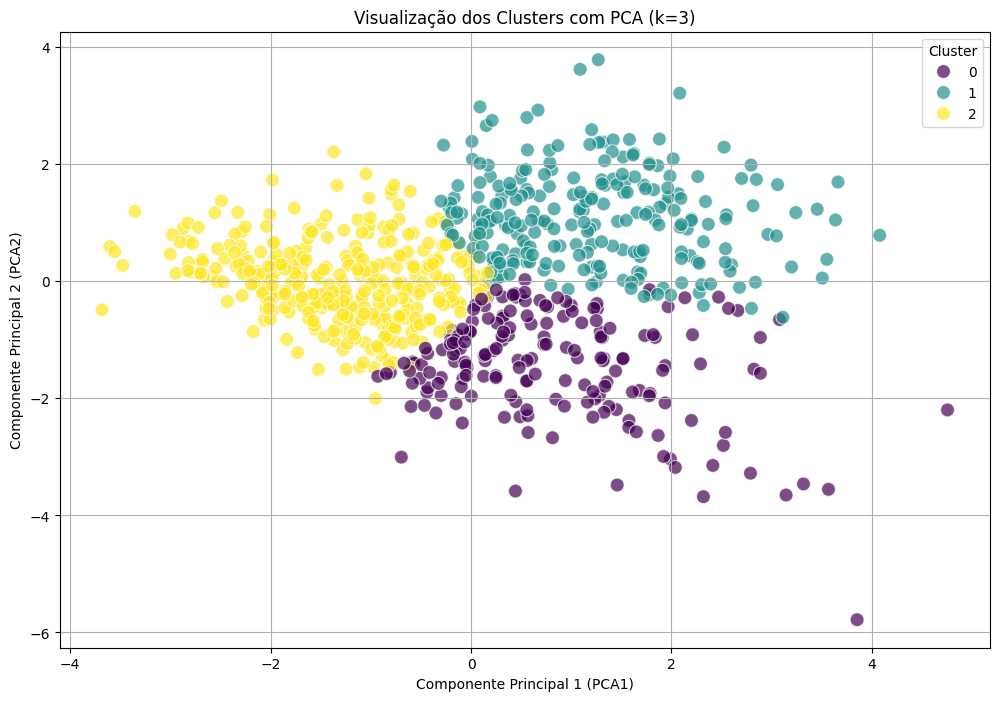

In [ ]:
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(data=X_pca, columns=['PCA1', 'PCA2'])
df_pca['Cluster'] = clusters

# Visualização dos clusters com PCA (Compoenentes Principais)
plt.figure(figsize=(12, 8))
sns.scatterplot(x='PCA1', y='PCA2', hue='Cluster', data=df_pca, palette='viridis', s=100, alpha=0.7)
plt.title('Visualização dos Clusters com PCA (k=3)')
plt.xlabel('Componente Principal 1 (PCA1)')
plt.ylabel('Componente Principal 2 (PCA2)')
plt.legend(title='Cluster')
plt.grid(True)
plt.savefig('kmeans_pca_plot.png')
plt.show()

## Criar uma interface com Streamlit

Nessa etapa foi feita a configuração da exibição dos resultados obtidos através do streamlit.

In [12]:
import streamlit as st
import pickle
import numpy as np

# Carregar o modelo e o scaler
try:
    with open("modelo_diabetes.pkl", "rb") as f:
        model = pickle.load(f)
    with open("scaler.pkl", "rb") as f:
        scaler = pickle.load(f)
except FileNotFoundError:
    st.error("Erro: Arquivos 'modelo_diabetes.pkl' ou 'scaler.pkl' não encontrados.")
    st.stop()

# --- Interface do Streamlit ---
st.title("Predição de Diabetes - Modelo de IA")
st.write("Insira os dados do paciente para prever o risco de diabetes.")

# Campos de entrada das 8 feactures
pregnancies = st.number_input("Número de Gestações", min_value=0, step=1)
glucose = st.number_input("Glicose (nível de glicose no plasma)", min_value=0.0)
blood_pressure = st.number_input("Pressão Arterial (diastólica, mm Hg)", min_value=0.0)
skin_thickness = st.number_input("Espessura da Dobra Cutânea (tríceps, mm)", min_value=0.0)
insulin = st.number_input("Insulina (soro de 2 horas, mu U/ml)", min_value=0.0)
bmi = st.number_input("IMC (Índice de Massa Corporal)", min_value=0.0)
dpf = st.number_input("Função de Pedigree de Diabetes", min_value=0.0, format="%.3f")
age = st.number_input("Idade (anos)", min_value=0, step=1)

# Botão para iniciar a predição
if st.button("Prever Risco de Diabetes"):
    if 'model' in locals() and 'scaler' in locals():
        input_data = np.array([[pregnancies, glucose, blood_pressure, skin_thickness,
                                insulin, bmi, dpf, age]])

        # Aplicando o Scaler
        input_scaled = scaler.transform(input_data)

        # Fazendo a predição
        prediction = model.predict(input_scaled)
        probability = model.predict_proba(input_scaled) # ver a probabilidade

        # Exibindo o resultado
        if prediction[0] == 1:
            st.error(f"Resultado: Diabético (Probabilidade: {probability[0][1]:.2f})")
        else:
            st.success(f"Resultado: Não Diabético (Probabilidade: {probability[0][0]:.2f})")
    else:
        st.warning("Modelo ou Scaler não carregados. Verifique os arquivos .pkl.")

2025-10-29 16:38:37.429 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.792 
  command:

    streamlit run C:\Users\rayra\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.13_qbz5n2kfra8p0\LocalCache\local-packages\Python313\site-packages\ipykernel_launcher.py [ARGUMENTS]
2025-10-29 16:38:37.793 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.794 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.795 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-10-29 16:38:37.795 Thread 'MainThread': missing ScriptRunContext! This w